25.03 Keras Project Notes

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from datetime import datetime 

In [3]:
data_info = pd.read_csv('../DATA/lending_club_info.csv',index_col='LoanStatNew')

In [3]:
data_info

,Description
LoanStatNew,
loan_amnt,The listed amount of the loan applied for by t...
term,The number of payments on the loan. Values are...
int_rate,Interest Rate on the loan
installment,The monthly payment owed by the borrower if th...
grade,LC assigned loan grade
sub_grade,LC assigned loan subgrade
emp_title,The job title supplied by the Borrower when ap...
emp_length,Employment length in years. Possible values ar...
home_ownership,The home ownership status provided by the borr...


In [83]:
data_info['Description']['revol_util']

'Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.'

In [46]:
df = pd.read_csv('../DATA/lending_club_loan_two.csv')

In [51]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


In [48]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [136]:
df.isna().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
emp_length                0
annual_inc                0
loan_status               0
dti                       0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util                0
total_acc                 0
mort_acc                  0
grade_num                 0
ANY                       0
MORTGAGE                  0
NONE                      0
OTHER                     0
OWN                       0
RENT                      0
INDIVIDUAL                0
JOINT                     0
car                       0
credit_card               0
debt_consolidation        0
educational               0
home_improvement          0
house                     0
major_purchase            0
medical                   0
moving                    0
other                     0
renewable_energy          0
small_business            0
vacation            

In [71]:
df['title'].nunique()

48817

In [85]:
df['title'][100:150]

100                                Personal
101                      Debt consolidation
102                           Consolidation
103                      Debt consolidation
104                                    Loan
105                             The trailer
106                   Fiscal Responsibility
107                          Major purchase
108                 Credit card refinancing
109                      Debt consolidation
110                            creditbuild1
111                      Debt consolidation
112                      Debt consolidation
113                      Debt consolidation
114                          Consolidation 
115                 Credit card refinancing
116                           consolidation
117                               FREEDOM 2
118                        Home Improvement
119                      Debt consolidation
120                      Debt consolidation
121                 Credit card refinancing
122                 Credit card 

In [77]:
debt_loans = df[df['title']=='Debt consolidation']

In [80]:
print(debt_loans['loan_status'].value_counts())

print(df['loan_status'].value_counts())
#Maybe write a function which determines if the loan title has 'credit' or 'debt' in it. 

Fully Paid     117384
Charged Off     35088
Name: loan_status, dtype: int64
Fully Paid     318357
Charged Off     77673
Name: loan_status, dtype: int64


In [67]:
emp_titles = df['emp_title'].unique()

In [90]:
df['emp_title'].head(20)  #too many to featrure engineer probably 

0                                  Marketing
1                            Credit analyst 
2                               Statistician
3                            Client Advocate
4                    Destiny Management Inc.
5                              HR Specialist
6              Software Development Engineer
7                               Office Depot
8                      Application Architect
9                         Regado Biosciences
10                                    Sodexo
11    Director Bureau of Equipment Inventory
12                  Social Work/Care Manager
13                          Regional Counsel
14                 Pullman Regional Hospital
15                               firefighter
16                  Comcast Corporate office
17                                 principal
18                                     Pilot
19                          Registered Nurse
Name: emp_title, dtype: object

In [91]:
df['loan_status'].head()

0     Fully Paid
1     Fully Paid
2     Fully Paid
3     Fully Paid
4    Charged Off
Name: loan_status, dtype: object

In [92]:
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [93]:
df['term'].nunique()

2

In [115]:
df['grade'].unique()

array(['B', 'A', 'C', 'E', 'D', 'F', 'G'], dtype=object)

In [120]:
df['sub_grade'].unique()

array(['B4', 'B5', 'B3', 'A2', 'C5', 'C3', 'A1', 'B2', 'C1', 'A5', 'E4',
       'A4', 'A3', 'D1', 'C2', 'B1', 'D3', 'D5', 'D2', 'E1', 'E2', 'E5',
       'F4', 'E3', 'D4', 'G1', 'F5', 'G2', 'C4', 'F1', 'F3', 'G5', 'G4',
       'F2', 'G3'], dtype=object)

In [188]:
df['emp_length'].head(20)

0     10+ years
1       4 years
2      < 1 year
3       6 years
4       9 years
5     10+ years
6       2 years
7     10+ years
8     10+ years
9       3 years
10      2 years
11      8 years
12      7 years
13    10+ years
14      9 years
15      8 years
16    10+ years
17    10+ years
18    10+ years
19      7 years
Name: emp_length, dtype: object

In [191]:
df['emp_length'].unique()

array(['10+ years', '4 years', '< 1 year', '6 years', '9 years',
       '2 years', '3 years', '8 years', '7 years', '5 years', '1 year',
       nan], dtype=object)

In [234]:
df['home_ownership'].unique() #use that function from sklearn to convert to matrix of 1s and 0s.

array(['RENT', 'MORTGAGE', 'OWN', 'OTHER', 'NONE', 'ANY'], dtype=object)

In [268]:
df['purpose'].unique()

array(['vacation', 'debt_consolidation', 'credit_card',
       'home_improvement', 'small_business', 'major_purchase', 'other',
       'medical', 'wedding', 'car', 'moving', 'house', 'educational',
       'renewable_energy'], dtype=object)

In [270]:
df[['title', 'purpose']].head() #title and purpose seem to be redundant with purpose being useable and titl not useable

,title,purpose
0,Vacation,vacation
1,Debt consolidation,debt_consolidation
2,Credit card refinancing,credit_card
3,Credit card refinancing,credit_card
4,Credit Card Refinance,credit_card


In [277]:
df['initial_list_status'].unique()

array(['w', 'f'], dtype=object)

In [284]:
df['verification_status'].unique()

array(['Not Verified', 'Source Verified', 'Verified'], dtype=object)

In [289]:
df[['issue_d', 'earliest_cr_line']]

,issue_d,earliest_cr_line
0,Jan-2015,Jun-1990
1,Jan-2015,Jul-2004
2,Jan-2015,Aug-2007
3,Nov-2014,Sep-2006
4,Apr-2013,Mar-1999
...,...,...
396025,Oct-2015,Nov-2004
396026,Feb-2015,Feb-2006
396027,Oct-2013,Mar-1997
396028,Aug-2012,Nov-1990


In [290]:
data_info['Description']['earliest_cr_line']

"The month the borrower's earliest reported credit line was opened"

In [58]:
print(df['revol_util'].median())

54.8


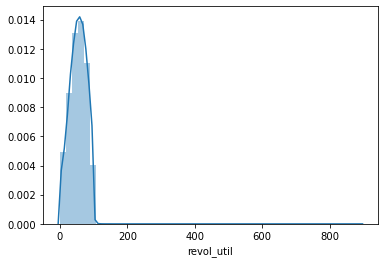

In [57]:
sns.distplot(df['revol_util']) #lots of outliers. This could be a problem

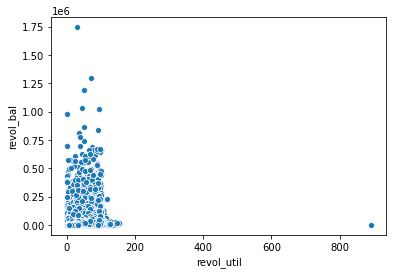

In [60]:
sns.scatterplot(x=df['revol_util'], y=df['revol_bal'])
#no correlation but there are outliers. Especially in revol_util

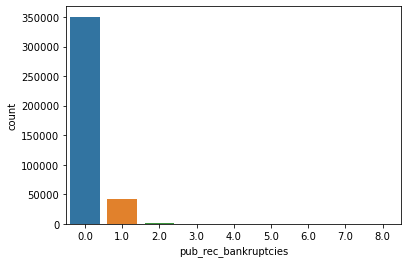

In [40]:
sns.countplot(data = df, x='pub_rec_bankruptcies')

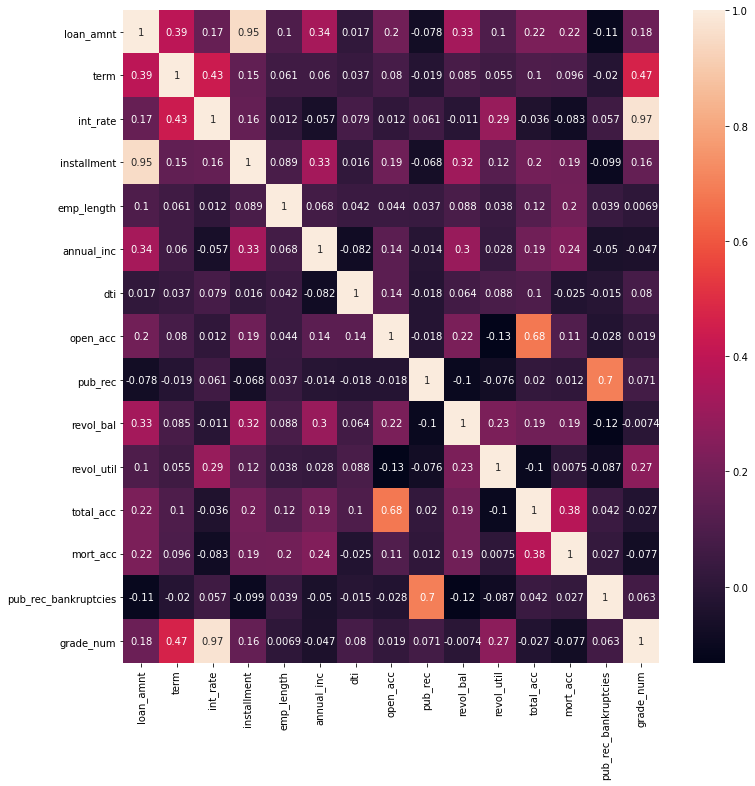

In [75]:
fig = plt.figure(figsize=(12,12))
sns.heatmap(df[['loan_amnt', 'term', 'int_rate', 'installment', 'emp_length',
       'annual_inc', 'loan_status', 'dti', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'mort_acc', 'pub_rec_bankruptcies',
       'grade_num']].corr(), annot=True)

In [76]:
df[['loan_amnt', 'term', 'int_rate', 'installment', 'emp_length',
       'annual_inc', 'loan_status', 'dti', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'mort_acc', 'pub_rec_bankruptcies',
       'grade_num']].corr()

,loan_amnt,term,int_rate,installment,emp_length,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,grade_num
loan_amnt,1.000000,0.393862,0.168921,0.953929,0.100087,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539,0.181908
term,0.393862,1.000000,0.434594,0.153378,0.060633,0.060330,0.036508,0.079575,-0.018758,0.084787,0.055166,0.101346,0.096220,-0.019826,0.468208
int_rate,0.168921,0.434594,1.000000,0.162758,0.012464,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450,0.974217
installment,0.953929,0.153378,0.162758,1.000000,0.088601,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628,0.163453
emp_length,0.100087,0.060633,0.012464,0.088601,1.000000,0.067569,0.041697,0.043565,0.037494,0.087731,0.038223,0.117836,0.198494,0.038690,0.006934
annual_inc,0.336887,0.060330,-0.056771,0.330381,0.067569,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162,-0.046798
dti,0.016636,0.036508,0.079038,0.015786,0.041697,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558,0.080196
open_acc,0.198556,0.079575,0.011649,0.188973,0.043565,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732,0.019105
pub_rec,-0.077779,-0.018758,0.060986,-0.067892,0.037494,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408,0.070811
revol_bal,0.328320,0.084787,-0.011280,0.316455,0.087731,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532,-0.007398


In [72]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'emp_length',
       'annual_inc', 'loan_status', 'dti', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'mort_acc', 'pub_rec_bankruptcies',
       'grade_num', 'ANY', 'MORTGAGE', 'NONE', 'OTHER', 'OWN', 'RENT',
       'INDIVIDUAL', 'JOINT', 'car', 'credit_card', 'debt_consolidation',
       'educational', 'home_improvement', 'house', 'major_purchase', 'medical',
       'moving', 'other', 'renewable_energy', 'small_business', 'vacation',
       'wedding', 'init_list_w', 'Source Verified', 'Verified',
       'days_1st_cred_to_issue'],
      dtype='object')

[(0.0, 200.0)]

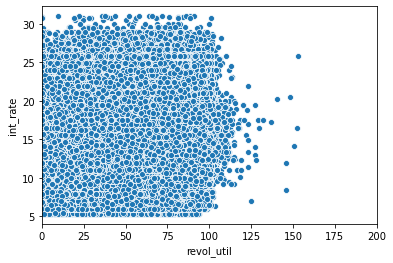

In [80]:
aa_plot = sns.scatterplot(x=df['revol_util'], y=df['int_rate'])
aa_plot.set(xlim=(0, 200))

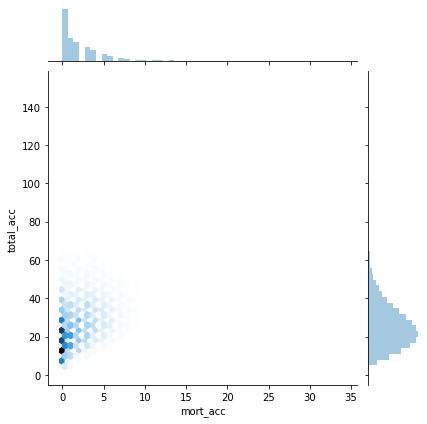

In [85]:
bb_plot = sns.jointplot(x=df['mort_acc'], y=df['total_acc'], kind='hex')

[(0.0, 20.0)]

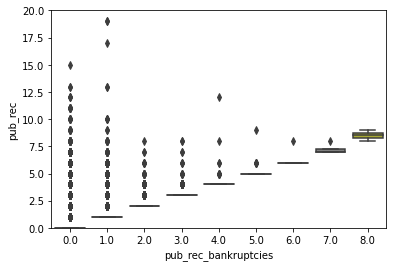

In [91]:
cc_plot = sns.boxplot(x=df['pub_rec_bankruptcies'], y=df['pub_rec'])
cc_plot.set(ylim=(0, 20)) #high degree of correlation but pub_rec_bankruptcies has missing data. So drop that one

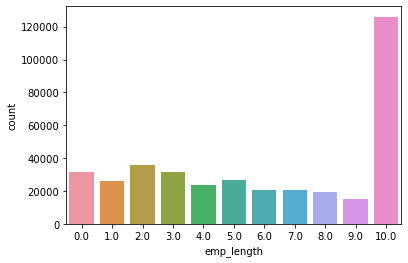

In [94]:
sns.countplot(df['emp_length']) #18301 instances of missing data

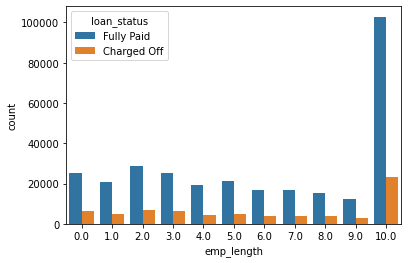

In [101]:
sns.countplot(df['emp_length'], hue=df['loan_status'])

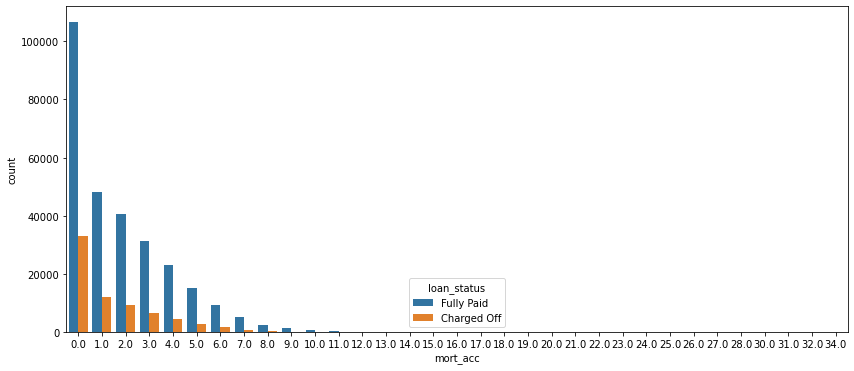

In [104]:
fig = plt.figure(figsize=(14,6))
sns.countplot(df['mort_acc'], hue=df['loan_status'])

In [96]:
#find loans with missing emp_length and mort_acc data
df[df['emp_length'].isna() & df['mort_acc'].isna()]

,loan_amnt,term,int_rate,installment,emp_length,annual_inc,loan_status,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,grade_num,ANY,MORTGAGE,NONE,OTHER,OWN,RENT,INDIVIDUAL,JOINT,car,credit_card,debt_consolidation,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding,init_list_w,Source Verified,Verified,days_1st_cred_to_issue
594,2000.0,36,11.49,65.95,NaN,45000.0,Charged Off,14.11,14.0,1.0,5972.0,47.8,22.0,NaN,9,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7701
911,8800.0,36,10.65,286.65,NaN,40000.0,Fully Paid,13.65,11.0,0.0,8823.0,18.9,19.0,NaN,7,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,4354
1708,2000.0,36,12.42,66.84,NaN,16200.0,Fully Paid,14.00,15.0,0.0,658.0,6.5,16.0,NaN,9,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,6757
1793,1000.0,36,10.75,32.63,NaN,64000.0,Fully Paid,8.51,7.0,0.0,4338.0,48.7,17.0,NaN,7,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,5204
1968,21000.0,36,7.51,653.33,NaN,81000.0,Fully Paid,14.22,17.0,0.0,30238.0,18.3,40.0,NaN,3,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,6271
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395216,9200.0,36,11.86,304.96,NaN,32496.0,Fully Paid,18.24,9.0,0.0,16547.0,59.1,23.0,NaN,10,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8431
395283,4800.0,36,12.42,160.40,NaN,30000.0,Fully Paid,22.88,10.0,0.0,3578.0,21.4,24.0,NaN,9,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,4078
395461,5550.0,60,13.06,126.46,NaN,16572.0,Charged Off,19.62,4.0,0.0,12966.0,83.7,9.0,NaN,12,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5600
395760,9600.0,36,12.42,320.79,NaN,35882.0,Fully Paid,13.38,9.0,0.0,8227.0,94.6,18.0,NaN,9,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,6089


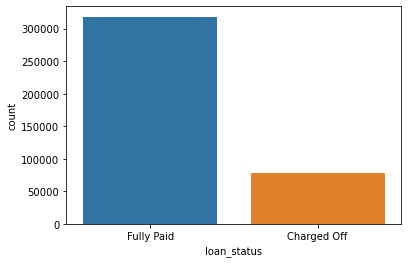

In [71]:
sns.countplot(data=df, x='loan_status') #slight imbalance in the class

# BEGIN ACTUAL FEATURE ENGINEERING HERE

In [112]:
df['term'] = df['term'].apply(lambda x:int(x.strip()[0:2])) #converts term to integer

In [ ]:
#convert grades to integers 
lett2num = list(range(7))
np.array(lett2num)
lett2num = np.multiply(lett2num, 5)
lett2num = lett2num.tolist()

lett_dict = dict(zip(['A', 'B', 'C', 'D', 'E', 'F', 'G'], lett2num)) 

In [ ]:
def grade_converter(grade):
    return (lett_dict[grade[0]]+int(grade[1]))

In [177]:
df['grade_num'] = df['sub_grade'].apply(grade_converter)

In [184]:
df.drop(['grade', 'sub_grade'], axis=1, inplace=True)

In [216]:
#convert employment length to digits

In [227]:
def emp_to_dig(e_length):
    if not isinstance(e_length, str):
        return e_length
    elif e_length == '10+ years':
        return 10
    elif e_length == '< 1 year':
        return 0
    else:
        return e_length[0]

In [230]:
df['emp_length'] = df['emp_length'].apply(emp_to_dig)

In [232]:
df.drop('emp_title', axis = 1, inplace=True)

In [235]:
#create dummy variables  for home ownership

In [239]:
home_own_dum = pd.get_dummies(df['home_ownership'])

In [240]:
df = pd.concat([df, home_own_dum], axis=1)

In [241]:
df.drop('home_ownership', axis=1,inplace=True)

In [243]:
df.drop('address', axis=1, inplace=True)

In [246]:
#create dummy variables  for home ownership
df['application_type'].unique()

array(['INDIVIDUAL', 'JOINT', 'DIRECT_PAY'], dtype=object)

In [247]:
app_type = pd.get_dummies(df['application_type'], drop_first=True)

In [249]:
df = pd.concat([df, app_type], axis=1)

In [251]:
df.drop('application_type', axis=1, inplace=True)

In [273]:
#create dummy variables  for purpose

In [274]:
purpose = pd.get_dummies(df['purpose'])
df = pd.concat([df, purpose], axis=1)
df.drop(['purpose', 'title'], axis=1, inplace=True)

In [278]:
init_list = pd.get_dummies(df['initial_list_status'], drop_first=True)
df = pd.concat([df, init_list], axis=1)
df.drop(['initial_list_status'], axis=1, inplace=True)

In [281]:
df.rename(columns = {'w':'init_list_w'}, inplace = True)

In [287]:
ver_status = pd.get_dummies(df['verification_status'], drop_first=True)
df = pd.concat([df, ver_status], axis=1)
df.drop(['verification_status'], axis=1, inplace=True)

In [31]:
#convert to dt objects
df['issue_d'] = df['issue_d'].apply(datetime.strptime, args=('%b-%Y',))
df['earliest_cr_line'] = df['earliest_cr_line'].apply(datetime.strptime, args=('%b-%Y',))

In [42]:
#get days between 1st credit line and issue date of this loan
df['days_1st_cred_to_issue'] = df['issue_d']-df['earliest_cr_line']

In [51]:
df['days_1st_cred_to_issue'] = df['days_1st_cred_to_issue'].apply(lambda x:x.days)

In [53]:
df.drop(['issue_d', 'earliest_cr_line'], axis=1, inplace=True)

In [92]:
#drop pub_rec_bankruptcies. Too correlated with pub_rec and has missing data
df.drop(['pub_rec_bankruptcies'], axis=1, inplace=True)

In [110]:
#drop rows with 2 or more NaNs 
df.dropna(thresh=40, inplace=True)

In [124]:
#imput data for emp_length and mort_acc
def imput_data(miss_data, median_val):
    if pd.isnull(miss_data):
        return median_val
    else: 
        return miss_data

In [129]:
df['emp_length'] = df['emp_length'].apply(imput_data, args=(df['emp_length'].median(), ))

In [130]:
df['mort_acc'] = df['mort_acc'].apply(imput_data, args=(df['mort_acc'].median(), ))

In [134]:
#drop reamining rows (only in revol_util column) that have NaNs
df.dropna(inplace=True)

In [14]:
#make the target binary
targ_list = pd.get_dummies(df['loan_status'], drop_first=True)
df = pd.concat([df, targ_list], axis=1)
df.drop(['loan_status'], axis=1, inplace=True)

In [11]:
pd.set_option('display.max_columns', None)

In [15]:
df.head()

,loan_amnt,term,int_rate,installment,emp_length,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,grade_num,ANY,MORTGAGE,NONE,OTHER,OWN,RENT,INDIVIDUAL,JOINT,car,credit_card,debt_consolidation,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding,init_list_w,Source Verified,Verified,days_1st_cred_to_issue,Fully Paid
0,10000.0,36,11.44,329.48,10.0,117000.0,26.24,16.0,0.0,36369.0,41.8,25.0,0.0,9,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,8980,1
1,8000.0,36,11.99,265.68,4.0,65000.0,22.05,17.0,0.0,20131.0,53.3,27.0,3.0,10,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3836,1
2,15600.0,36,10.49,506.97,0.0,43057.0,12.79,13.0,0.0,11987.0,92.2,26.0,0.0,8,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2710,1
3,7200.0,36,6.49,220.65,6.0,54000.0,2.60,6.0,0.0,5472.0,21.5,13.0,0.0,2,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2983,1
4,24375.0,60,17.27,609.33,9.0,55000.0,33.95,13.0,0.0,24584.0,69.8,43.0,1.0,15,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,5145,0


In [10]:
#df.info()

In [ ]:
#list of features with nans: emp_length, revol_util, mort_acc
#might need a second round of feature engineering that removes outliers

In [16]:
df.to_csv('lending_club_feat_eng.csv')

In [6]:
df = pd.read_csv('lending_club_feat_eng.csv', index_col=0)